## **Imports**

In [51]:
from itu_helper import ItuHelper
from logger import Logger

from math import ceil

import matplotlib.pyplot as plt
import numpy as np

## **Set the log level**

In [2]:
# Logger.set_log_level("info")
# Logger.set_log_level("error")
Logger.set_log_level("none")

## **Initilize the ITU Helper connection**

In [3]:
helper = ItuHelper()
helper.print_counts()

Total number of lessons: 3716
Total number of students enrolled: 136281
Total number of courses: 9518
Total number of buildings: 34


## **Plots**

### **2. Distribution of Enrolled Students**

> :warning: If a student has multiple courses on the same day, there is no way to identify it so the data might include duplicated enrollment data for some students.

In [18]:
weekday_counts_per_building = dict()
for l in helper.lessons:
    for building, day in zip(helper.get_building_from_lesson(l)[0], l.days):
        if day is None or "--" in day: continue # Skip lessons without a day
        if building is None or "--" in building: continue # Skip lessons without a building

        # Add the neccessary keys to the dict if they don't exist
        if building not in weekday_counts_per_building.keys():
            weekday_counts_per_building[building] = dict()

        if day not in weekday_counts_per_building[building].keys():
            weekday_counts_per_building[building][day] = 0
            
        # Add the enrolled student count to the array
        weekday_counts_per_building[building][day] += l.enrolled

# Remove the buildings that have no enrolled students
buildings_to_remove = []
for b in weekday_counts_per_building.keys():
    if sum(weekday_counts_per_building[b].values()) <= 0:
        buildings_to_remove.append(b)

for b in buildings_to_remove:
    weekday_counts_per_building.pop(b)

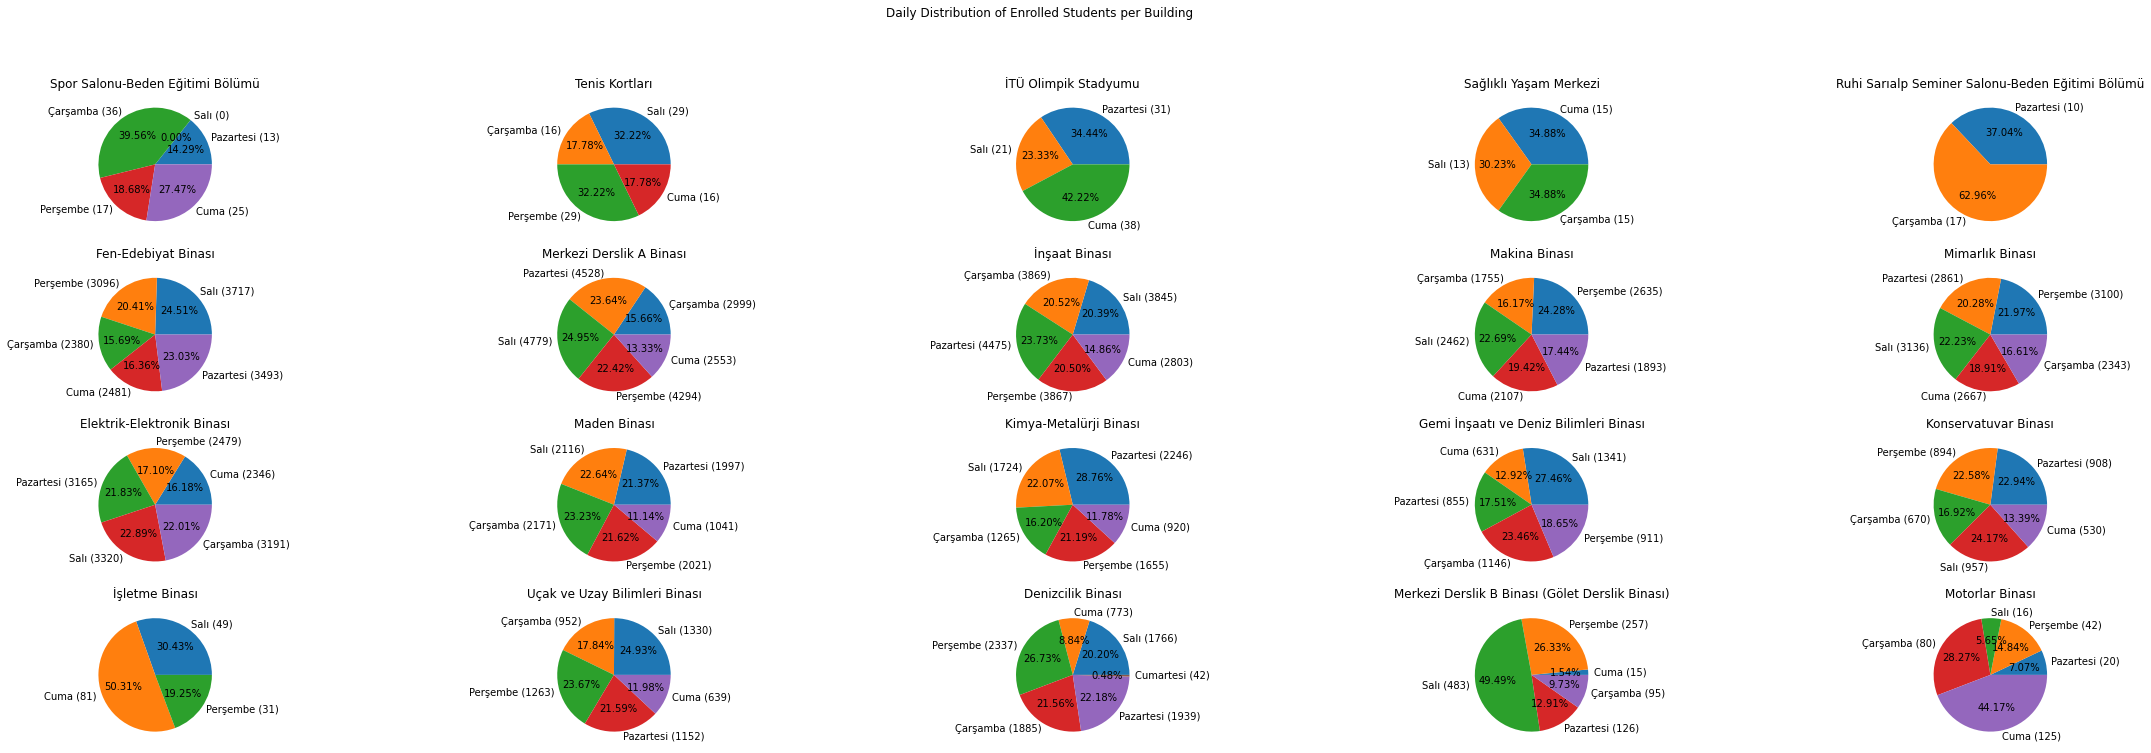

In [42]:
ROW_LENGTH = 5

fig, axs = plt.subplots(
    ceil(len(weekday_counts_per_building) // ROW_LENGTH), ROW_LENGTH,
    figsize=(37, 12), facecolor="w", gridspec_kw={'wspace': 1}
)

for i, (building, days) in enumerate(weekday_counts_per_building.items()):
    axs[i // ROW_LENGTH][i % ROW_LENGTH].pie(days.values(), labels=[f"{d.title()} ({v})" for d, v in days.items()], autopct=lambda pct: f"{pct:.2f}%")
    axs[i // ROW_LENGTH][i % ROW_LENGTH].set_title(building)

fig.suptitle("Daily Distribution of Enrolled Students per Building")
plt.show()

{'pazartesi': 29712, 'çarşamba': 24885, 'perşembe': 28928, 'cuma': 19806, 'salı': 31104, 'cumartesi': 42}


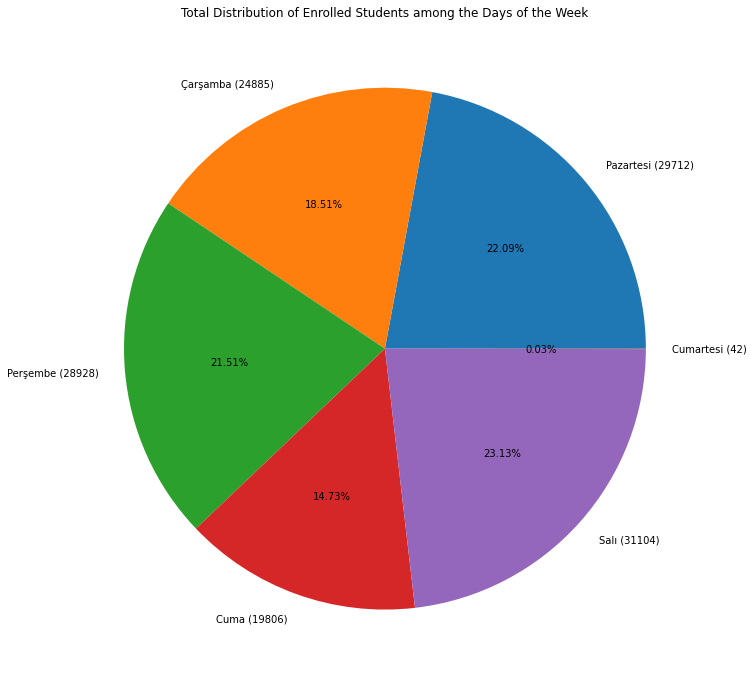

In [43]:
weekday_counts = dict()
for weekday_counts_of_building in weekday_counts_per_building.values():
    for day, enrolled in weekday_counts_of_building.items():
        if enrolled <= 0: continue
        if day not in weekday_counts.keys():
            weekday_counts[day] = 0
        
        weekday_counts[day] += enrolled

fig, ax = plt.subplots(
    figsize=(35, 12), facecolor="w", gridspec_kw={'wspace': 1}
)

print(weekday_counts)
ax.pie(weekday_counts.values(), labels=[f"{d.title()} ({v})" for d, v in weekday_counts.items()], autopct=lambda pct: f"{pct:.2f}%")
ax.set_title("Distribution of Enrolled Students among the Days of the Week")

plt.show()

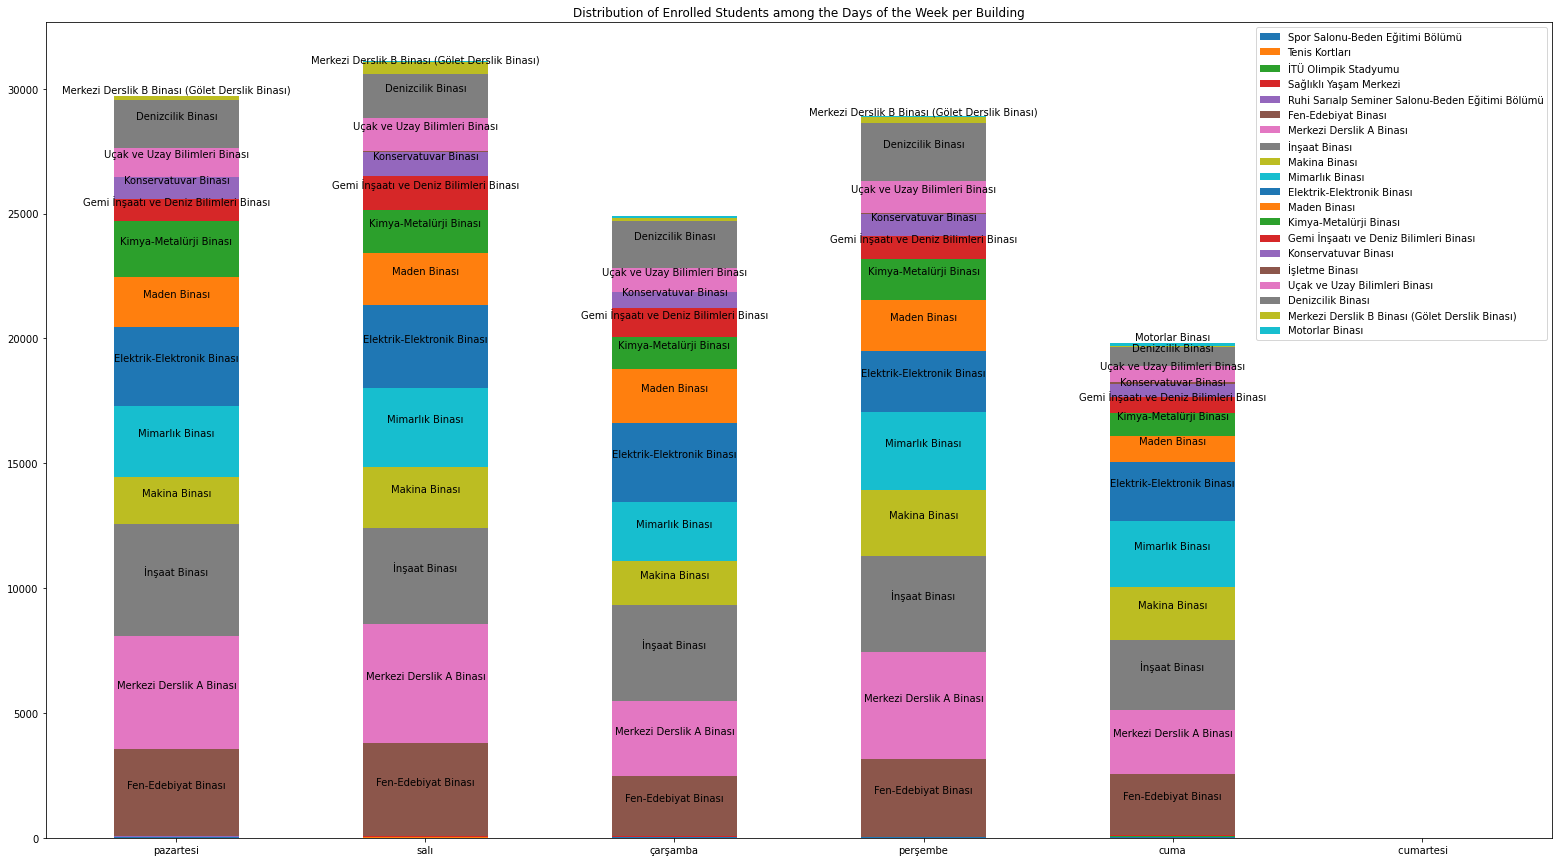

In [66]:

def get_days_axes(days: list[str]) -> tuple[list[int], list[str]]:
    day_names = ["pazartesi", "salı", "çarşamba", "perşembe", "cuma"," cumartesi"]
    output = [0] * 6
    for i, d in enumerate(day_names):
        if d in days.keys():
            output[i] = days[d]

    return day_names, output

fig, ax = plt.subplots(figsize=(27, 15), facecolor="w")
bottom = np.zeros(6)

for i, (building, days) in enumerate(weekday_counts_per_building.items()):
    x, y = get_days_axes(days)
    p = ax.bar(x, y, .5, label=building, bottom=bottom)
    
    # Add building names on the bars
    for i, rect in enumerate(p):
        height = rect.get_height()
        if height < 100: continue
        ax.annotate(f"{building}", xy=(rect.get_x() + rect.get_width() / 2, height * .5 + bottom[i]), xytext=(0, 3),
                    textcoords="offset points", ha='center', va='bottom')

    bottom += y

ax.set_title("Distribution of Enrolled Students among the Days of the Week per Building")
ax.legend(loc="upper right")

plt.show()

In [87]:
# === BUSIEST BUILDING ===
busiest_building = None
busiest_building_count = 0
for building, days in weekday_counts_per_building.items():
    if sum(days.values()) > busiest_building_count:
        busiest_building = building
        busiest_building_count = sum(days.values())

print(f"The busiest building is \"{busiest_building}\" with {busiest_building_count:,} students enrolled weekly")

# === LEAST BUSIEST BUILDING ===
least_busiest_building = None
least_busiest_building_count = 0
for building, days in weekday_counts_per_building.items():
    if sum(days.values()) < least_busiest_building_count or least_busiest_building_count == 0:
        least_busiest_building = building
        least_busiest_building_count = sum(days.values())

print(f"The least busiest building is \"{least_busiest_building}\" with {least_busiest_building_count:,} students enrolled weekly")

# === BUSIEST DAY ===
busiest_day = None
busiest_day_count = 0
for day, enrolled in weekday_counts.items():
    if enrolled > busiest_day_count:
        busiest_day = day
        busiest_day_count = enrolled

print(f"The busiest day is \"{busiest_day.title()}\" with {busiest_day_count:,} students enrolled")

# === LEAST BUSIEST DAY ===
least_busiest_day = None
least_busiest_day_count = 0
for day, enrolled in weekday_counts.items():
    if enrolled < least_busiest_day_count or least_busiest_day_count == 0:
        least_busiest_day = day
        least_busiest_day_count = enrolled

print(f"The least busiest day is \"{least_busiest_day.title()}\" with {least_busiest_day_count:,} students enrolled")

print("=" * 30)

# === AVERAGE STUDENT COUNT PER DAY ===
average_student_count_per_day = sum(weekday_counts.values()) / len(weekday_counts)
print(f"The average student count per day is {average_student_count_per_day:,.2f}")

# === AVERAGE STUDENT COUNT PER BUILDING ===
average_student_count_per_building = sum([sum(days.values()) for days in weekday_counts_per_building.values()]) / len(weekday_counts_per_building)
print(f"The average student count per building is {average_student_count_per_building:,.2f}")

# === BUILDINGS WITH LESS THAN AVERAGE STUDENT COUNT ===
buildings_with_less_than_average_student_count = []
for building, days in weekday_counts_per_building.items():
    total = sum(days.values())
    if total < average_student_count_per_building:
        buildings_with_less_than_average_student_count.append((building, total))

print("=" * 30)

print(f"The buildings with less than average student count are:")
for b, t in buildings_with_less_than_average_student_count:
    print(f"- {b} ({t:,} enrolled weekly)")

The busiest building is "Merkezi Derslik A Binası" with 19,153 students enrolled weekly
The least busiest building is "Ruhi Sarıalp Seminer Salonu-Beden Eğitimi Bölümü" with 27 students enrolled weekly
The busiest day is "Salı" with 31,104 students enrolled
The least busiest day is "Cumartesi" with 42 students enrolled
The average student count per day is 22,412.83
The average student count per building is 6,723.85
The buildings with less than average student count are:
- Spor Salonu-Beden Eğitimi Bölümü (91 enrolled weekly)
- Tenis Kortları (90 enrolled weekly)
- İTÜ Olimpik Stadyumu (90 enrolled weekly)
- Sağlıklı Yaşam Merkezi (43 enrolled weekly)
- Ruhi Sarıalp Seminer Salonu-Beden Eğitimi Bölümü (27 enrolled weekly)
- Gemi İnşaatı ve Deniz Bilimleri Binası (4,884 enrolled weekly)
- Konservatuvar Binası (3,959 enrolled weekly)
- İşletme Binası (161 enrolled weekly)
- Uçak ve Uzay Bilimleri Binası (5,336 enrolled weekly)
- Merkezi Derslik B Binası (Gölet Derslik Binası) (976 enrolle